In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('../KivaLoans_data/kiva_loans.csv')

In [3]:
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [4]:
loans[loans['loan_amount'] < loans['funded_amount']]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
277188,924149,425.0,400.0,General Store,Retail,"to buy beverages, rice, laundry detergent, sug...",MZ,Mozambique,"Boane, Maputo",MZN,23.0,2015-07-28 07:14:04+00:00,2015-07-22 07:00:00+00:00,NaN,17.0,11,"#Parent, user_favorite",male,monthly,2015-07-28
338159,985199,3400.0,3000.0,Farm Supplies,Agriculture,"to pay for wires for the grape orchard, cover ...",AM,Armenia,"Hoktember village, Armavir region",USD,169.0,2015-11-25 10:53:00+00:00,2015-10-29 07:00:00+00:00,NaN,38.0,84,"#Elderly, #Job Creator, #Trees, #Vegan, user_f...",male,monthly,2015-11-25


In [19]:
# check how many null values are in each column
loans.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [6]:
loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [7]:
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [8]:
# loans['funded_time'].fillna(pd.Timestamp(1970, 1, 1, 0, 0, 0, 0, 0), inplace=True)
# loans['funded_time']

In [9]:
# Change dates to datetime types
loans['posted_time'] = pd.to_datetime(loans['posted_time'], )
loans['disbursed_time'] = pd.to_datetime(loans['disbursed_time'])
loans['date'] = pd.to_datetime(loans['date'])

In [10]:
loans['funded_time']

0         2014-01-02 10:06:32+00:00
1         2014-01-02 09:17:23+00:00
2         2014-01-01 16:01:36+00:00
3         2014-01-01 13:00:00+00:00
4         2014-01-01 19:18:51+00:00
                    ...            
671200                          NaN
671201    2017-07-26 02:09:43+00:00
671202                          NaN
671203                          NaN
671204                          NaN
Name: funded_time, Length: 671205, dtype: object

In [11]:
# changed term of the loan in months to a float
loans['term_in_months'] = loans['term_in_months'].astype('float')
loans['lender_count'] = loans['lender_count'].astype('float')

In [12]:
# get all column names that contain null values
null_cols = loans.loc[:, loans.isnull().sum() > 0].columns.tolist()

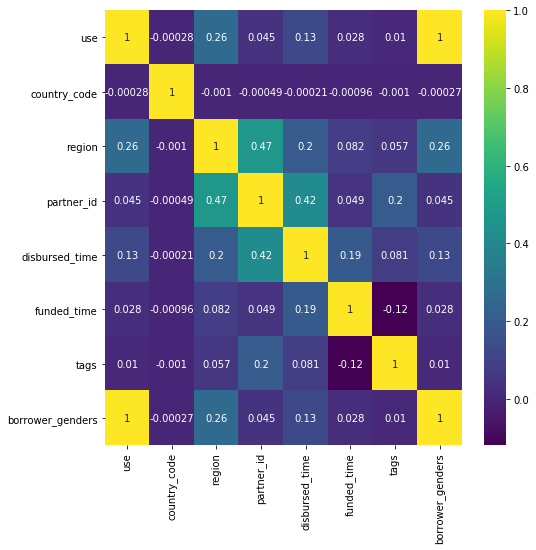

In [13]:
# get the correlations of null values to see how often they appear in the same row
nullval_corrs = loans.loc[:, loans.isnull().sum() > 0].isnull().astype(int).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(nullval_corrs, cmap='viridis', annot=True)

In [14]:
nullval_corrs

,use,country_code,region,partner_id,disbursed_time,funded_time,tags,borrower_genders
use,1.000000,-0.000275,0.261644,0.045418,0.127783,0.027907,0.010109,0.998691
country_code,-0.000275,1.000000,-0.001050,-0.000495,-0.000207,-0.000962,-0.001032,-0.000275
region,0.261644,-0.001050,1.000000,0.471324,0.196855,0.082067,0.057401,0.261639
partner_id,0.045418,-0.000495,0.471324,1.000000,0.417663,0.048531,0.198181,0.044835
disbursed_time,0.127783,-0.000207,0.196855,0.417663,1.000000,0.191582,0.080606,0.126381
funded_time,0.027907,-0.000962,0.082067,0.048531,0.191582,1.000000,-0.119731,0.027564
tags,0.010109,-0.001032,0.057401,0.198181,0.080606,-0.119731,1.000000,0.009984
borrower_genders,0.998691,-0.000275,0.261639,0.044835,0.126381,0.027564,0.009984,1.000000


In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  671205 non-null  int64              
 1   funded_amount       671205 non-null  float64            
 2   loan_amount         671205 non-null  float64            
 3   activity            671205 non-null  object             
 4   sector              671205 non-null  object             
 5   use                 666973 non-null  object             
 6   country_code        671197 non-null  object             
 7   country             671205 non-null  object             
 8   region              614405 non-null  object             
 9   currency            671205 non-null  object             
 10  partner_id          657698 non-null  float64            
 11  posted_time         671205 non-null  datetime64[ns, UTC]
 12  disbursed_time  

In [16]:
# loans['time_til_funded'] = loans['funded_time'] - loans['posted_time']
# # loans['time_til_funded']

In [17]:
# loans[loans['time_til_funded'].isnull()][['funded_amount', 'loan_amount']]

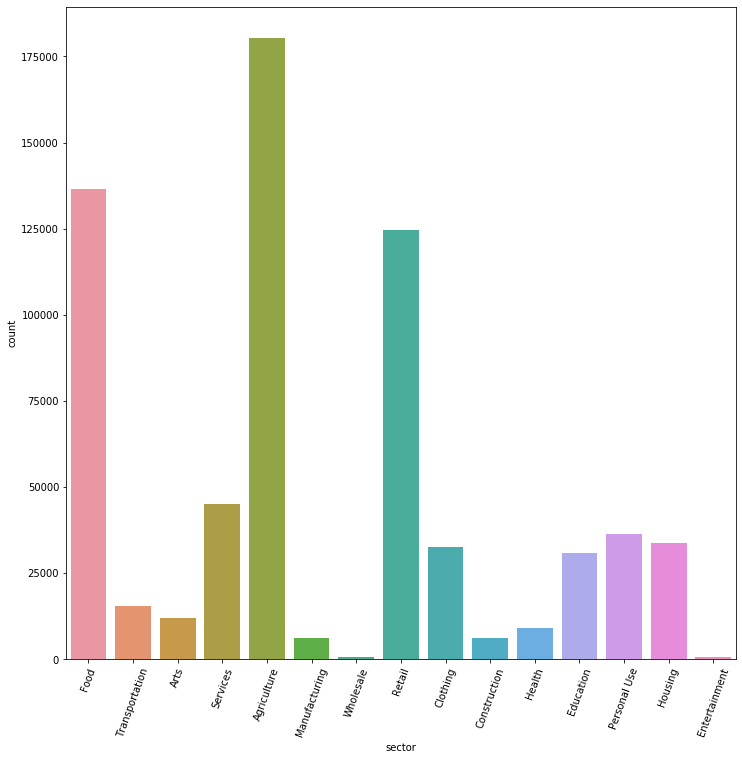

In [18]:
plt.figure(figsize=(12,12))
g = sns.countplot(data=loans, x='sector')
g.tick_params(axis='x', rotation=70, right=True)

In [79]:
# plt.figure(figsize=(12,8))
# g = sns.countplot(data=loans, x='country')
# g.tick_params(axis='x', rotation=70, right=True)

In [80]:
# let's get the # of unique values in each col
uniques = pd.Series({col: loans[col].unique().shape[0] for col in loans.columns})
uniques = uniques.sort_values(ascending=False)

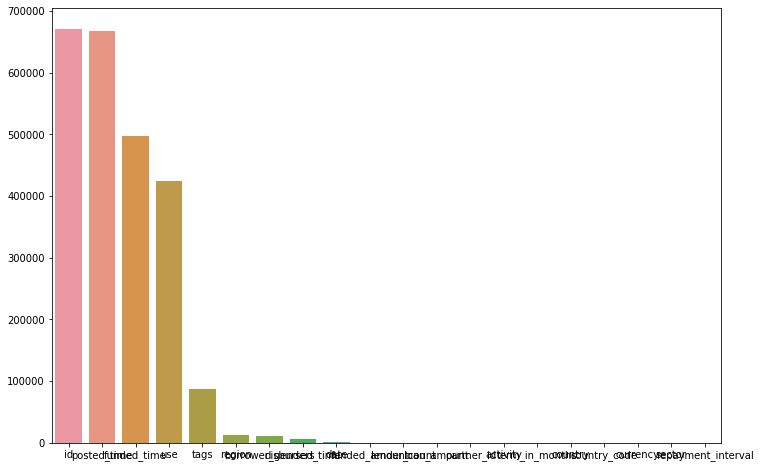

In [81]:
plt.figure(figsize=(12, 8))
uns = sns.barplot(x=uniques.index, y=uniques.values)

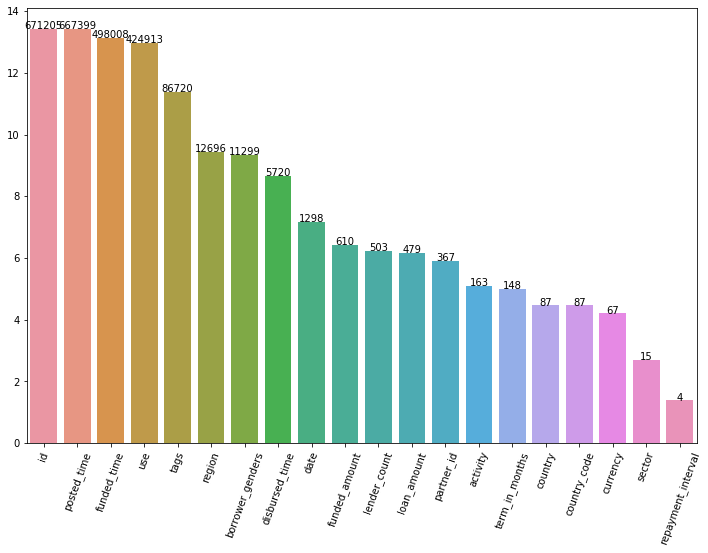

In [82]:
plt.figure(figsize=(12, 8))
uns = sns.barplot(x=uniques.index, y=np.log(uniques.values))
for index, val in enumerate(uniques.values):
    uns.text(index,np.log(val),val, color='black', ha="center")    
uns.tick_params(axis='x', rotation=70, left=True)

plt.savefig('unique_vals_per_col.png')

In [83]:
loans[loans['use'].isin([''])]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date


In [84]:
# fill use in with '' since it has not been filled out
#loans['use'] = loans['use'].fillna('')

In [85]:
loans[loans['use'].isnull()]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
140,653375,2975.0,2975.0,Food Production/Sales,Food,NaN,TZ,Tanzania,NaN,TZS,87.0,2014-01-02 15:31:52+00:00,2013-12-24 08:00:00+00:00,2014-01-22 13:42:40+00:00,10.0,110.0,user_favorite,NaN,monthly,2014-01-02
145,653427,1200.0,1200.0,Personal Expenses,Personal Use,NaN,PE,Peru,NaN,PEN,139.0,2014-01-02 22:43:24+00:00,2013-12-17 08:00:00+00:00,2014-02-01 23:49:27+00:00,20.0,44.0,"#Single, user_favorite, user_favorite",NaN,monthly,2014-01-02
170,653177,4250.0,4250.0,Catering,Food,NaN,TZ,Tanzania,NaN,TZS,87.0,2014-01-02 06:46:10+00:00,2013-12-26 08:00:00+00:00,2014-01-23 16:52:15+00:00,10.0,116.0,"#Schooling, #Repeat Borrower, #Woman Owned Biz...",NaN,monthly,2014-01-02
412,653513,2350.0,2350.0,Beauty Salon,Services,NaN,TZ,Tanzania,NaN,TZS,87.0,2014-01-03 05:08:11+00:00,2013-12-31 08:00:00+00:00,2014-01-21 15:33:01+00:00,10.0,75.0,"user_favorite, #Parent, #Woman Owned Biz, user...",NaN,monthly,2014-01-03
414,653775,725.0,725.0,Agriculture,Agriculture,NaN,SV,El Salvador,NaN,USD,199.0,2014-01-03 21:41:23+00:00,2013-12-16 08:00:00+00:00,2014-01-28 17:28:43+00:00,20.0,19.0,"#Animals, #Repeat Borrower, #Schooling, user_f...",NaN,monthly,2014-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671151,1340245,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,138.0,2017-07-20 23:13:01+00:00,2017-07-20 07:00:00+00:00,NaN,13.0,0.0,NaN,NaN,monthly,2017-07-20
671174,1340275,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-21 23:51:18+00:00,2017-07-21 07:00:00+00:00,NaN,13.0,0.0,NaN,NaN,monthly,2017-07-21
671178,1340280,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,138.0,2017-07-22 06:16:55+00:00,2017-07-21 07:00:00+00:00,NaN,13.0,0.0,NaN,NaN,monthly,2017-07-22
671185,1340298,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,138.0,2017-07-24 07:34:50+00:00,2017-07-17 07:00:00+00:00,NaN,13.0,0.0,NaN,NaN,monthly,2017-07-24


In [47]:
loans['funded_time'].fillna(pd.Timestamp(1970, 1, 1, 0, 0, 0, 0, 0), inplace=True)
loans['funded_time'] = pd.to_datetime(loans['funded_time'])

In [48]:
loans['funded_time']

0        2014-01-02 10:06:32+00:00
1        2014-01-02 09:17:23+00:00
2        2014-01-01 16:01:36+00:00
3        2014-01-01 13:00:00+00:00
4        2014-01-01 19:18:51+00:00
                    ...           
671200   1970-01-01 00:00:00+00:00
671201   2017-07-26 02:09:43+00:00
671202   1970-01-01 00:00:00+00:00
671203   1970-01-01 00:00:00+00:00
671204   1970-01-01 00:00:00+00:00
Name: funded_time, Length: 671205, dtype: datetime64[ns, UTC]

In [88]:
 for v in loans.columns:  
        print( '\ncolumn ' + v + ': ')
        print( 'dtype.str: ', loans[v].dtype.str )
        print( 'dtype:     ', loans[v].dtype )
        print( 'timestamp? ', loans[v].dtype.str[1] == 'M' )


column id: 
dtype.str:  <i8
dtype:      int64
timestamp?  False

column funded_amount: 
dtype.str:  <f8
dtype:      float64
timestamp?  False

column loan_amount: 
dtype.str:  <f8
dtype:      float64
timestamp?  False

column activity: 
dtype.str:  |O
dtype:      object
timestamp?  False

column sector: 
dtype.str:  |O
dtype:      object
timestamp?  False

column use: 
dtype.str:  |O
dtype:      object
timestamp?  False

column country_code: 
dtype.str:  |O
dtype:      object
timestamp?  False

column country: 
dtype.str:  |O
dtype:      object
timestamp?  False

column region: 
dtype.str:  |O
dtype:      object
timestamp?  False

column currency: 
dtype.str:  |O
dtype:      object
timestamp?  False

column partner_id: 
dtype.str:  <f8
dtype:      float64
timestamp?  False

column posted_time: 
dtype.str:  |M8[ns]
dtype:      datetime64[ns, UTC]
timestamp?  True

column disbursed_time: 
dtype.str:  |M8[ns]
dtype:      datetime64[ns, UTC]
timestamp?  True

column funded_time: 
dtype.st

In [20]:
# loans['time_til_funded'] = loans['funded_time'] - loans['posted_time']
# loans['time_til_funded']

In [21]:
# fill in region with most popular region in country?

In [22]:
null_cols

['use',
 'country_code',
 'region',
 'partner_id',
 'disbursed_time',
 'funded_time',
 'tags',
 'borrower_genders']

In [23]:
# fill tags in with '' since there were no tags filled out?

In [24]:
loans[loans['partner_id'].isnull()]['borrower_genders'].value_counts()

female    10661
male       2427
Name: borrower_genders, dtype: int64

In [25]:
loans['partner_id'].min()

9.0

In [26]:
# if there is no partner associated with this loan, partner id is null
# should fill in with 0?

In [27]:
# there can be up to 50 borrowers on a loan!
max(loans.borrower_genders.str.split(',').str.len())

50.0

In [28]:
loans[(loans.borrower_genders.str.split(',').str.len()).isin([47.0, 49.0, 45.0])].borrower_genders

18624     female, female, female, female, female, female...
30497     female, female, male, female, female, female, ...
39822     male, male, female, female, male, female, fema...
58278     male, male, female, male, male, male, male, ma...
83976     female, female, male, male, female, female, fe...
89014     female, female, female, female, female, female...
112265    female, female, male, female, female, female, ...
161589    female, male, male, male, female, female, male...
170236    female, female, female, female, female, male, ...
176800    female, female, female, female, female, female...
190772    female, female, female, female, female, female...
195240    male, female, female, male, female, female, ma...
195664    male, male, female, female, male, male, female...
198185    female, male, female, female, female, female, ...
233512    female, male, male, female, male, female, fema...
236604    female, female, female, female, female, female...
297604    female, female, female, female

In [29]:
loans[loans['disbursed_time'].isnull()]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
2221,1080194,30.0,4500.0,Clothing,Clothing,increase the inventory of my online clothing b...,US,United States,NaN,USD,NaN,2014-01-08 22:40:15+00:00,NaT,NaN,24.0,2.0,NaN,female,bullet,2014-01-08
2514,1080215,50.0,2500.0,Crafts,Arts,start a new photography business by providing ...,US,United States,NaN,USD,NaN,2014-01-09 23:55:12+00:00,NaT,NaN,13.0,2.0,NaN,male,bullet,2014-01-09
3065,1080225,10.0,5000.0,Services,Services,help my partner and I couch women in the fashi...,US,United States,NaN,USD,NaN,2014-01-10 17:22:31+00:00,NaT,NaN,30.0,1.0,NaN,female,bullet,2014-01-10
3072,1080216,755.0,10000.0,Services,Services,NaN,US,United States,NaN,USD,NaN,2014-01-10 00:18:32+00:00,NaT,NaN,24.0,55.0,NaN,NaN,bullet,2014-01-10
3847,1080244,125.0,125.0,Services,Services,NaN,KE,Kenya,NaN,KES,NaN,2014-01-14 08:13:48+00:00,NaT,2014-01-23 13:38:53+00:00,2.0,6.0,NaN,NaN,bullet,2014-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670825,1337741,0.0,2000.0,Cleaning Services,Services,me purchase a new commercial vacuum cleaner an...,US,United States,NaN,USD,NaN,2017-07-11 00:00:00+00:00,NaT,NaN,18.0,0.0,NaN,female,bullet,2017-07-11
670833,1337927,500.0,10000.0,Retail,Retail,me remodel and expand my new storefront.,US,United States,NaN,USD,NaN,2017-07-11 00:00:00+00:00,NaT,NaN,36.0,9.0,NaN,female,bullet,2017-07-11
670883,1337787,1350.0,2000.0,Grocery Store,Food,"me to to buy more fruit, prep materials and pu...",US,United States,NaN,USD,NaN,2017-07-11 00:00:00+00:00,NaT,NaN,18.0,21.0,"user_favorite, user_favorite, user_favorite, #...",male,bullet,2017-07-11
670914,1337780,1000.0,7000.0,Arts,Arts,"us get a U.S. patent, and update our website &...",US,United States,NaN,USD,NaN,2017-07-11 00:00:00+00:00,NaT,NaN,36.0,7.0,NaN,female,bullet,2017-07-11


In [30]:
loans[loans['country_code'].isnull()]['country']

202537    Namibia
202823    Namibia
344929    Namibia
351177    Namibia
420953    Namibia
421218    Namibia
487207    Namibia
487653    Namibia
Name: country, dtype: object

In [31]:
loans[loans['country_code'].isin(['NB'])]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date


In [32]:
loans['country_code'].unique()

array(['PK', 'IN', 'KE', 'NI', 'SV', 'TZ', 'PH', 'PE', 'SN', 'KH', 'LR',
       'VN', 'IQ', 'HN', 'PS', 'MN', 'US', 'ML', 'CO', 'TJ', 'GT', 'EC',
       'BO', 'YE', 'GH', 'SL', 'HT', 'CL', 'JO', 'UG', 'BI', 'BF', 'TL',
       'ID', 'GE', 'UA', 'XK', 'AL', 'CD', 'CR', 'SO', 'ZW', 'CM', 'TR',
       'AZ', 'DO', 'BR', 'MX', 'KG', 'AM', 'PY', 'LB', 'WS', 'IL', 'RW',
       'ZM', 'NP', 'CG', 'MZ', 'ZA', 'TG', 'BJ', 'BZ', 'SR', 'TH', 'NG',
       'MR', 'VU', 'PA', 'VI', 'VC', 'LA', 'MW', 'MM', 'MD', 'SS', 'SB',
       'CN', 'EG', 'GU', 'AF', 'MG', nan, 'PR', 'LS', 'CI', 'BT'],
      dtype=object)

In [33]:
def get_lens(x):
    """
    make lens 0 if we replaced it to ''.
    """
    if x == '':
        return 0
    else:
        return len(x.split(','))

In [34]:
loans[loans['borrower_genders'].fillna('').apply(get_lens) != loans.borrower_genders.str.split(',').str.len()]['borrower_genders']

140       NaN
145       NaN
170       NaN
412       NaN
414       NaN
         ... 
671151    NaN
671174    NaN
671178    NaN
671185    NaN
671202    NaN
Name: borrower_genders, Length: 4221, dtype: object

In [35]:
loans[loans['tags'].fillna('').apply(get_lens) == 0].shape[0]

171416

In [36]:
loans['use'].fillna('').apply(get_lens) 

0         2
1         1
2         1
3         1
4         1
         ..
671200    3
671201    2
671202    0
671203    2
671204    2
Name: use, Length: 671205, dtype: int64

In [37]:
loans.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [38]:
# fill in tags with blank if null
loans['tags'] = loans['tags'].fillna('')

In [39]:
# fill use in with blank if null
loans['use'] = loans['use'].fillna('')

In [40]:
loans['partner_id'].min()

9.0

In [41]:
loans['partner_id'] = loans['partner_id'].fillna(0)

In [42]:
loans['country_code'] = loans['country_code'].fillna('NB')

In [43]:
loans[loans['borrower_genders'].isnull()]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
140,653375,2975.0,2975.0,Food Production/Sales,Food,,TZ,Tanzania,NaN,TZS,87.0,2014-01-02 15:31:52+00:00,2013-12-24 08:00:00+00:00,2014-01-22 13:42:40+00:00,10.0,110.0,user_favorite,NaN,monthly,2014-01-02
145,653427,1200.0,1200.0,Personal Expenses,Personal Use,,PE,Peru,NaN,PEN,139.0,2014-01-02 22:43:24+00:00,2013-12-17 08:00:00+00:00,2014-02-01 23:49:27+00:00,20.0,44.0,"#Single, user_favorite, user_favorite",NaN,monthly,2014-01-02
170,653177,4250.0,4250.0,Catering,Food,,TZ,Tanzania,NaN,TZS,87.0,2014-01-02 06:46:10+00:00,2013-12-26 08:00:00+00:00,2014-01-23 16:52:15+00:00,10.0,116.0,"#Schooling, #Repeat Borrower, #Woman Owned Biz...",NaN,monthly,2014-01-02
412,653513,2350.0,2350.0,Beauty Salon,Services,,TZ,Tanzania,NaN,TZS,87.0,2014-01-03 05:08:11+00:00,2013-12-31 08:00:00+00:00,2014-01-21 15:33:01+00:00,10.0,75.0,"user_favorite, #Parent, #Woman Owned Biz, user...",NaN,monthly,2014-01-03
414,653775,725.0,725.0,Agriculture,Agriculture,,SV,El Salvador,NaN,USD,199.0,2014-01-03 21:41:23+00:00,2013-12-16 08:00:00+00:00,2014-01-28 17:28:43+00:00,20.0,19.0,"#Animals, #Repeat Borrower, #Schooling, user_f...",NaN,monthly,2014-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671151,1340245,0.0,25.0,Livestock,Agriculture,,KE,Kenya,NaN,KES,138.0,2017-07-20 23:13:01+00:00,2017-07-20 07:00:00+00:00,NaN,13.0,0.0,,NaN,monthly,2017-07-20
671174,1340275,0.0,25.0,Games,Entertainment,,KE,Kenya,NaN,KES,138.0,2017-07-21 23:51:18+00:00,2017-07-21 07:00:00+00:00,NaN,13.0,0.0,,NaN,monthly,2017-07-21
671178,1340280,0.0,25.0,Livestock,Agriculture,,KE,Kenya,NaN,KES,138.0,2017-07-22 06:16:55+00:00,2017-07-21 07:00:00+00:00,NaN,13.0,0.0,,NaN,monthly,2017-07-22
671185,1340298,0.0,25.0,Livestock,Agriculture,,KE,Kenya,NaN,KES,138.0,2017-07-24 07:34:50+00:00,2017-07-17 07:00:00+00:00,NaN,13.0,0.0,,NaN,monthly,2017-07-24


In [56]:
(loans['funded_time'] - loans['posted_time']).dt.seconds

0         14033
1          8775
2         21809
3         17809
4         26732
          ...  
671200    25466
671201    71735
671202    86273
671203    64025
671204    62894
Length: 671205, dtype: int64

In [57]:
(loans['funded_time'] - loans['posted_time'])

0              1 days 03:53:53
1              1 days 02:26:15
2              0 days 06:03:29
3              0 days 04:56:49
4              0 days 07:25:32
                  ...         
671200   -17373 days +07:04:26
671201         0 days 19:55:35
671202   -17374 days +23:57:53
671203   -17374 days +17:47:05
671204   -17374 days +17:28:14
Length: 671205, dtype: timedelta64[ns]

In [59]:
loans['time_til_funded'] = loans['funded_time'] - loans['posted_time']

In [62]:
loans['time_til_funded'].dt.days * 1440, loans['time_til_funded'].dt.seconds

(0             1440
 1             1440
 2                0
 3                0
 4                0
             ...   
 671200   -25017120
 671201           0
 671202   -25018560
 671203   -25018560
 671204   -25018560
 Name: time_til_funded, Length: 671205, dtype: int64,
 0         14033
 1          8775
 2         21809
 3         17809
 4         26732
           ...  
 671200    25466
 671201    71735
 671202    86273
 671203    64025
 671204    62894
 Name: time_til_funded, Length: 671205, dtype: int64)

In [ ]:
loans['borrow_genders'] = loans['borrower_genders'].fillna('')

1440

In [67]:
loans['time_til_funded'][0].seconds / 60

233.88333333333333

In [74]:
mins_per_day = 24 * 60
secs_per_min = 60
loans['time_til_funded_mins'] = (loans['time_til_funded'].dt.days * mins_per_day) +  (loans['time_til_funded'].dt.seconds // secs_per_min)

In [75]:
loans['time_til_funded_mins']

0             1673
1             1586
2              363
3              296
4              445
            ...   
671200   -25016696
671201        1195
671202   -25017123
671203   -25017493
671204   -25017512
Name: time_til_funded_mins, Length: 671205, dtype: int64

In [76]:
def is_loan_funded(x):
    if x >= 0:
        return 1
    else:
        return 0

In [79]:
loans['time_til_funded_mins'].apply(is_loan_funded).sum()

622873

In [80]:
loans['loan_funded'] = loans['time_til_funded_mins'].apply(is_loan_funded)

In [81]:
# target variable of the classification algorithim
loans['loan_funded']

0         1
1         1
2         1
3         1
4         1
         ..
671200    0
671201    1
671202    0
671203    0
671204    0
Name: loan_funded, Length: 671205, dtype: int64

In [82]:
loans.isnull().sum()

id                          0
funded_amount               0
loan_amount                 0
activity                    0
sector                      0
use                         0
country_code                0
country                     0
region                  56800
currency                    0
partner_id                  0
posted_time                 0
disbursed_time           2396
funded_time                 0
term_in_months              0
lender_count                0
tags                        0
borrower_genders         4221
repayment_interval          0
date                        0
time_til_funded             0
time_til_funded_mins        0
loan_funded                 0
dtype: int64

In [84]:
def partner(x):
    if x > 0:
        return 1
    else:
        return 0

In [86]:
loans['partner_on_loan'] = loans['partner_id'].apply(partner)

In [89]:
(loans['partner_on_loan'] == 0).sum()

13507

In [93]:
loans['posted_hour'] = loans['posted_time'].dt.hour

In [100]:
loans['posted_day'] = loans['posted_time'].dt.dayofweek

In [97]:
{0: 'hi'}[0]

'hi'

In [98]:
day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [99]:
day_map

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [106]:
loans['posted_day'] = loans['posted_day'].map(day_map)

In [107]:
loans['posted_day']

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
671200      Tuesday
671201      Tuesday
671202    Wednesday
671203    Wednesday
671204    Wednesday
Name: posted_day, Length: 671205, dtype: object

In [108]:
def borrower_lens(x):
    if x == '':
        return 1
    else:
        return len(x.split(','))
    

In [110]:
loans['borrower_genders'] = loans['borrower_genders'].fillna('')
loans['num_of_borrowers'] = loans['borrower_genders'].apply(borrower_lens)

In [111]:
loans['num_of_borrowers']

0         1
1         2
2         1
3         1
4         1
         ..
671200    1
671201    1
671202    1
671203    1
671204    1
Name: num_of_borrowers, Length: 671205, dtype: int64

In [112]:
loans['borrower_genders'].str.split(',')

0                  [female]
1         [female,  female]
2                  [female]
3                  [female]
4                  [female]
                ...        
671200             [female]
671201             [female]
671202                   []
671203             [female]
671204             [female]
Name: borrower_genders, Length: 671205, dtype: object

In [113]:
loans['borrower_genders']

0                 female
1         female, female
2                 female
3                 female
4                 female
               ...      
671200            female
671201            female
671202                  
671203            female
671204            female
Name: borrower_genders, Length: 671205, dtype: object

In [127]:
loans['borrower_genders'][1].split(',')[1].strip()

'female'

In [130]:
np.sum([1 for i in loans['borrower_genders'][1].split(',') if i.strip() == 'female'])

2

In [133]:
def get_num_females(x):
    gens = x.split(',')
    return np.sum([1 for i in gens if i.strip() == 'female'])

def get_num_males(x):
    gens = x.split(',')
    return np.sum([1 for i in gens if i.strip() == 'male'])

In [134]:
loans['num_of_females'] = loans['borrower_genders'].apply(get_num_females)

In [135]:
loans['num_of_males'] = loans['borrower_genders'].apply(get_num_males)

In [136]:
loans['female_pct'] = loans['num_of_females'] / loans['num_of_borrowers']

In [145]:
loans[(loans['female_pct'] < 1.0) & (loans['female_pct'] > 0.0)].iloc[:, -5:].head(10)

,posted_day,num_of_borrowers,num_of_females,num_of_males,female_pct
59,Thursday,4,3.0,1.0,0.750000
88,Thursday,13,12.0,1.0,0.923077
93,Thursday,12,7.0,5.0,0.583333
97,Thursday,4,1.0,3.0,0.250000
157,Thursday,6,5.0,1.0,0.833333
194,Thursday,7,2.0,5.0,0.285714
208,Thursday,10,2.0,8.0,0.200000
216,Thursday,4,3.0,1.0,0.750000
230,Thursday,9,6.0,3.0,0.666667
237,Thursday,9,8.0,1.0,0.888889


In [159]:
loans['words_in_use'] = loans['use'].str.split(' ').str.len()

In [155]:
loans['use'][0].split(' ')

['To', 'buy', 'seasonal,', 'fresh', 'fruits', 'to', 'sell.', '']

In [195]:
loans['tags'].str.split(',')

0                                      []
1                                      []
2         [user_favorite,  user_favorite]
3                                      []
4                                      []
                       ...               
671200                                 []
671201                                 []
671202                                 []
671203                                 []
671204                                 []
Name: tags, Length: 671205, dtype: object

In [198]:
#loans['tags'].str.split(',')
loans[loans['tags'] != '']['tags'].str.split(',')

2                           [user_favorite,  user_favorite]
6                           [user_favorite,  user_favorite]
7                             [#Elderly,  #Woman Owned Biz]
8                                           [user_favorite]
12                    [#Repeat Borrower,  #Woman Owned Biz]
                                ...                        
671145    [user_favorite,  #Parent,  #Biz Durable Asset,...
671146                                           [#Animals]
671147                                           [#Elderly]
671148                             [#Health and Sanitation]
671149                    [#Parent,  #Repair Renew Replace]
Name: tags, Length: 499789, dtype: object

In [199]:
loans['tags'].str.split(',')

0                                      []
1                                      []
2         [user_favorite,  user_favorite]
3                                      []
4                                      []
                       ...               
671200                                 []
671201                                 []
671202                                 []
671203                                 []
671204                                 []
Name: tags, Length: 671205, dtype: object

In [200]:
loans['tag_list'] = loans['tags'].str.split(',')

In [204]:
loans['tag_list']

0                                      []
1                                      []
2         [user_favorite,  user_favorite]
3                                      []
4                                      []
                       ...               
671200                                 []
671201                                 []
671202                                 []
671203                                 []
671204                                 []
Name: tag_list, Length: 671205, dtype: object

In [219]:
if loans['tag_list'][2][0]:
    print(123)
else:
    print(False)
    

123


In [216]:
loans['tag_list'][0]

['']

In [220]:
def tag_len(x):
    if x[0]:
        return len(x)
    else:
        return 0
    

In [222]:
loans['num_of_tags'] = loans['tag_list'].apply(tag_len)

In [224]:
loans[loans['num_of_tags'] != 0]['tags']

2                              user_favorite, user_favorite
6                              user_favorite, user_favorite
7                                #Elderly, #Woman Owned Biz
8                                             user_favorite
12                       #Repeat Borrower, #Woman Owned Biz
                                ...                        
671145    user_favorite, #Parent, #Biz Durable Asset, #V...
671146                                             #Animals
671147                                             #Elderly
671148                               #Health and Sanitation
671149                       #Parent, #Repair Renew Replace
Name: tags, Length: 499789, dtype: object

In [225]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   id                    671205 non-null  int64              
 1   funded_amount         671205 non-null  float64            
 2   loan_amount           671205 non-null  float64            
 3   activity              671205 non-null  object             
 4   sector                671205 non-null  object             
 5   use                   671205 non-null  object             
 6   country_code          671205 non-null  object             
 7   country               671205 non-null  object             
 8   region                614405 non-null  object             
 9   currency              671205 non-null  object             
 10  partner_id            671205 non-null  float64            
 11  posted_time           671205 non-null  datetime64[ns

In [226]:
loans.isnull().sum()

id                          0
funded_amount               0
loan_amount                 0
activity                    0
sector                      0
use                         0
country_code                0
country                     0
region                  56800
currency                    0
partner_id                  0
posted_time                 0
disbursed_time           2396
funded_time                 0
term_in_months              0
lender_count                0
tags                        0
borrower_genders            0
repayment_interval          0
date                        0
time_til_funded             0
time_til_funded_mins        0
loan_funded                 0
partner_on_loan             0
posted_hour                 0
posted_day                  0
num_of_borrowers            0
num_of_females              0
num_of_males                0
female_pct                  0
words_in_use                0
tag_list                    0
num_of_tags                 0
dtype: int

In [230]:
loans['pct_funded'] = loans['funded_amount'] / loans['loan_amount']
loans['pct_funded'][:10]

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: pct_funded, dtype: float64

In [231]:
loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'time_til_funded', 'time_til_funded_mins', 'loan_funded',
       'partner_on_loan', 'posted_hour', 'posted_day', 'num_of_borrowers',
       'num_of_females', 'num_of_males', 'female_pct', 'words_in_use',
       'tag_list', 'num_of_tags', 'pct_funded'],
      dtype='object')

In [233]:
model_data = loans[['loan_amount', 'activity', 'sector','country', 'currency',
       'term_in_months', 'lender_count', 'repayment_interval', 
       'time_til_funded_mins', 'loan_funded', 'partner_on_loan', 
       'posted_hour', 'posted_day', 'num_of_borrowers', 'female_pct', 
       'words_in_use', 'num_of_tags', 'pct_funded']]

In [234]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amount           671205 non-null  float64
 1   activity              671205 non-null  object 
 2   sector                671205 non-null  object 
 3   country               671205 non-null  object 
 4   currency              671205 non-null  object 
 5   term_in_months        671205 non-null  float64
 6   lender_count          671205 non-null  float64
 7   repayment_interval    671205 non-null  object 
 8   time_til_funded_mins  671205 non-null  int64  
 9   loan_funded           671205 non-null  int64  
 10  partner_on_loan       671205 non-null  int64  
 11  posted_hour           671205 non-null  int64  
 12  posted_day            671205 non-null  object 
 13  num_of_borrowers      671205 non-null  int64  
 14  female_pct            671205 non-null  float64
 15  

In [235]:
model_data.describe()

,loan_amount,term_in_months,lender_count,time_til_funded_mins,loan_funded,partner_on_loan,posted_hour,num_of_borrowers,female_pct,words_in_use,num_of_tags,pct_funded
count,671205.000000,671205.000000,671205.000000,6.712050e+05,671205.000000,671205.000000,671205.000000,671205.000000,671205.000000,671205.000000,671205.000000,671205.000000
mean,842.397107,13.739022,20.590922,-1.724792e+06,0.927992,0.979876,10.170580,2.011953,0.764947,10.550008,2.374951,0.960563
std,1198.660073,8.598919,28.459551,6.269220e+06,0.258501,0.140423,5.939073,3.403832,0.410038,5.018179,2.213472,0.158867
min,25.000000,1.000000,0.000000,-2.501751e+07,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,275.000000,8.000000,7.000000,6.190000e+03,1.000000,1.000000,6.000000,1.000000,0.750000,7.000000,0.000000,1.000000
50%,500.000000,13.000000,13.000000,1.249900e+04,1.000000,1.000000,9.000000,1.000000,1.000000,10.000000,2.000000,1.000000
75%,1000.000000,14.000000,24.000000,3.034900e+04,1.000000,1.000000,14.000000,1.000000,1.000000,13.000000,4.000000,1.000000
max,100000.000000,158.000000,2986.000000,6.056250e+05,1.000000,1.000000,23.000000,50.000000,1.000000,436.000000,94.000000,1.133333


In [236]:
pwd

'C:\\Users\\afs95\\MyPython\\KivaLoans'

In [237]:
model_data.to_csv('../KivaLoans_data/model_data.csv')